In [1]:
import pandas as pd
import numpy as np
from scipy.stats import kruskal, mannwhitneyu
import matplotlib.pyplot as plt

liwc = pd.read_csv('../output/LIWC.csv')
liwc.drop(['Unnamed: 0', 'Unnamed: 0.1', 'objective'], axis=1, inplace=True)

In [2]:
# liwc_cats = ['Analytic', 'Clout', 'Authentic', 'Tone','Drives', 'Affect', 'Social', 
#              'Physical','tone_pos','emo_pos','tone_neg', 'emo_neg','emo_anx','emo_anger',
#              'emo_sad', 'illness', 'wellness', 'mental', 'substances', 'sexual', 'food', 
#              'death', 'need', 'want', 'acquire', 'lack', 'fulfill', 'fatigue', 'reward', 
#              'risk', 'curiosity', 'allure', 'family', 'friend', 'focuspast','focuspresent',
#              'focusfuture','moral', 'prosocial', 'conflict']
liwc_vars = liwc.columns[18:].to_list()
connection = ['inquisition', 'disclosure']
subject = ['dependency', 'recovery', 'other']
objectives = ['Quality', 'Legality', 'Effects', 'Methods of Ingestion', 'Combination of Substances', 'Mental Health',
          'N/A', 'Other', 'Overdose', 'Nurturant Support & Morality', 'Withdrawal', 'Safety', 'Relapse']
# to lower
objectives = [x.lower() for x in objectives]

In [5]:
# all_cols = objectives + liwc_cats + ['connection','subjective']
# liwc_filter = liwc[all_cols]

In [4]:
# determine which liwc categories are significant
# manwhitneyu test for inquisition vs disclosure since there are only 2 groups
results_c = []
for c in liwc_vars:
    results_c.append([c, 
                    mannwhitneyu(liwc[liwc['connection'] == 'inquisition'][c],
                                    liwc[liwc['connection'] == 'disclosure'][c]).statistic,
                    mannwhitneyu(liwc[liwc['connection'] == 'inquisition'][c],
                                 liwc[liwc['connection'] == 'disclosure'][c]).pvalue])
    

In [11]:
for c in results_c:
    if c[2] < 0.05:
        print(c)
# store significant categories
results_c_sig = [x for x in results_c if x[2] < 0.05]
sig_cats = [x[0] for x in results_c if x[2] < 0.05]

['Analytic', 243579.5, 0.00012897143826633872]
['Clout', 250284.0, 0.002292170860467308]
['Authentic', 293117.0, 0.031244347238241134]
['Tone', 258826.0, 0.041538135344504956]
['pronoun', 295571.5, 0.014437303154006932]
['we', 259474.5, 0.00012114805795709306]
['shehe', 261976.0, 0.002938926379360534]
['ipron', 313308.0, 3.6900980099700856e-06]
['affiliation', 260449.5, 0.030330881023745725]
['Cognition', 350105.0, 1.5791196737128335e-19]
['allnone', 258605.5, 0.023679715736434882]
['cogproc', 362331.5, 6.544748647206657e-26]
['insight', 339356.5, 1.2181872088474479e-15]
['cause', 320804.0, 4.097862913432137e-09]
['discrep', 324689.5, 2.639590795252707e-10]
['tentat', 369763.5, 1.3947931900638242e-31]
['certitude', 260060.5, 0.01405327725817528]
['differ', 323592.5, 2.0934500804937106e-09]
['memory', 264263.0, 0.00042414134204760124]
['Affect', 232529.0, 1.8612284166721668e-07]
['tone_pos', 246516.0, 0.0003273636080491518]
['emotion', 239357.0, 2.975182607158191e-06]
['emo_pos', 241968

In [12]:
# get effect sizes - cohens d
cohens_d = []
for c in sig_cats:
    inq = liwc[liwc['connection'] == 'inquisition'][c]
    dis = liwc[liwc['connection'] == 'disclosure'][c]
    cohens_d.append([c, (inq.mean() - dis.mean()) / (inq.std() + dis.std())])
# cohens_d = sorted(cohens_d, key=lambda x: x[1], reverse=True)
# cohens_d

In [17]:
# get the ratio of means between inquisition and disclosure for the top 20 categories
# top_20 = cohens_d[:20]
liwc_ratio = []
for c in cohens_d:
    inq = liwc[liwc['connection'] == 'inquisition'][c[0]].mean()
    dis = liwc[liwc['connection'] == 'disclosure'][c[0]].mean()
    liwc_ratio.append([c[0], inq/dis])
# liwc_ratio = sorted(liwc_ratio, key=lambda x: x[1], reverse=True)
liwc_ratio

[['Analytic', 0.8542758115865918],
 ['Clout', 0.8989426874796137],
 ['Authentic', 1.0742970852993448],
 ['Tone', 0.8834540916211386],
 ['pronoun', 1.0725965834539346],
 ['we', 0.4926689033887025],
 ['shehe', 0.7661656529097336],
 ['ipron', 1.1962760585258023],
 ['affiliation', 0.7802797516686132],
 ['Cognition', 1.3312780868587182],
 ['allnone', 0.753870704923165],
 ['cogproc', 1.4209236959022646],
 ['insight', 1.4848222214852405],
 ['cause', 1.5064578217623386],
 ['discrep', 1.5858310289299482],
 ['tentat', 2.0848788493141917],
 ['certitude', 0.686183261183261],
 ['differ', 1.3319499859623192],
 ['memory', 0.400439334620631],
 ['Affect', 0.6716099086348472],
 ['tone_pos', 0.5836936087255581],
 ['emotion', 0.5953607446689216],
 ['emo_pos', 0.41433239139816236],
 ['emo_anger', 0.6959319776299823],
 ['emo_sad', 0.8593384696308672],
 ['swear', 0.6216652582931775],
 ['socbehav', 0.9858239147992949],
 ['prosocial', 1.2443106636124248],
 ['polite', 1.5091279114928369],
 ['conflict', 0.664582

In [18]:
# combine manwhitney and cohensd and export
connection_analysis = pd.DataFrame(results_c_sig, columns=['category', 'statistic', 'pvalue'])
connection_analysis['cohens_d'] = [x[1] for x in cohens_d]
connection_analysis['ratio'] = [x[1] for x in liwc_ratio]
connection_analysis.to_csv('../output/connection_analysis.csv')

---
### Subject Analysis

1. Test for Difference in Means (Kruskal-Wallis Test)
2. Effect Size (Cohen's d)
3. Get Ratios for Significantly Different Features 

In [19]:
# difference in means
results_s = []
for c in liwc_vars:
    results_s.append([c, 
                    mannwhitneyu(liwc[liwc['subjective'] == 'dependency'][c],
                                    liwc[liwc['subjective'] == 'recovery'][c]).statistic,
                    mannwhitneyu(liwc[liwc['subjective'] == 'dependency'][c],
                                 liwc[liwc['subjective'] == 'recovery'][c]).pvalue])

In [23]:
results_s_sig = [x for x in results_s if x[2] < 0.05]
sig_cats_s = [x[0] for x in results_s if x[2] < 0.05]
# look at effect sizes for dependency vs other and recovery vs other
cohens_d_s_d = []
cohens_d_s_r = []
for c in sig_cats_s:
    dep = liwc[liwc['subjective'] == 'dependency'][c]
    rec = liwc[liwc['subjective'] == 'recovery'][c]
    oth = liwc[liwc['subjective'] == 'other'][c]
    cohens_d_s_d.append([c, (dep.mean() - oth.mean()) / (dep.std() + oth.std())])
    cohens_d_s_r.append([c, (rec.mean() - oth.mean()) / (rec.std() + oth.std())])


In [21]:
liwc_ratio_s_d = []
liwc_ratio_s_r = []
for c in cohens_d_s_d:
    dep = liwc[liwc['subjective'] == 'dependency'][c[0]].mean()
    oth = liwc[liwc['subjective'] == 'other'][c[0]].mean()
    liwc_ratio_s_d.append([c[0], dep/oth])
for c in cohens_d_s_r:
    rec = liwc[liwc['subjective'] == 'recovery'][c[0]].mean()
    oth = liwc[liwc['subjective'] == 'other'][c[0]].mean()
    liwc_ratio_s_r.append([c[0], rec/oth])


In [24]:
# merge
subjective_analysis = pd.DataFrame(results_s_sig, columns=['category', 'statistic', 'pvalue'])
subjective_analysis['cohens_d_dep'] = [x[1] for x in cohens_d_s_d]
subjective_analysis['cohens_d_rec'] = [x[1] for x in cohens_d_s_r]
subjective_analysis['ratio_dep'] = [x[1] for x in liwc_ratio_s_d]
subjective_analysis['ratio_rec'] = [x[1] for x in liwc_ratio_s_r]
subjective_analysis.to_csv('../output/subjective_analysis.csv')

---

### Connection x Subject Analysis

1. Within Inquisition, Test for Difference in Means
2. Within Disclosure, Test for Difference in Means

In [25]:
# difference in means
liwc_inq = liwc[liwc['connection'] == 'inquisition']
results_inq = []
for c in liwc_vars:
    results_inq.append([c, 
                    mannwhitneyu(liwc_inq[liwc_inq['subjective'] == 'dependency'][c],
                                    liwc_inq[liwc_inq['subjective'] == 'recovery'][c]).statistic,
                    mannwhitneyu(liwc_inq[liwc_inq['subjective'] == 'dependency'][c],
                                 liwc_inq[liwc_inq['subjective'] == 'recovery'][c]).pvalue])
    
results_inq_sig = [x for x in results_inq if x[2] < 0.05]

In [30]:
# effect sizes
cohens_d_inq_d = []
cohens_d_inq_r = []
for c in results_inq_sig:
    dep = liwc_inq[liwc_inq['subjective'] == 'dependency'][c[0]]
    rec = liwc_inq[liwc_inq['subjective'] == 'recovery'][c[0]]
    other = liwc_inq[liwc_inq['subjective'] == 'other'][c[0]]
    cohens_d_inq_d.append([c[0], (dep.mean() - other.mean()) / (dep.std() + other.std())])
    cohens_d_inq_r.append([c[0], (rec.mean() - other.mean()) / (rec.std() + other.std())])
    

In [27]:
# ratio of means
liwc_ratio_inq_d = []
liwc_ratio_inq_r = []
for c in cohens_d_inq_d:
    dep = liwc_inq[liwc_inq['subjective'] == 'dependency'][c[0]].mean()
    other = liwc_inq[liwc_inq['subjective'] == 'other'][c[0]].mean()
    liwc_ratio_inq_d.append([c[0], dep/other])
for c in cohens_d_inq_r:
    rec = liwc_inq[liwc_inq['subjective'] == 'recovery'][c[0]].mean()
    other = liwc_inq[liwc_inq['subjective'] == 'other'][c[0]].mean()
    liwc_ratio_inq_r.append([c[0], rec/other])
    

In [29]:
# disclosure 
liwc_dis = liwc[liwc['connection'] == 'disclosure']
results_dis = []
for c in liwc_vars:
    results_dis.append([c, 
                    mannwhitneyu(liwc_dis[liwc_dis['subjective'] == 'dependency'][c],
                                    liwc_dis[liwc_dis['subjective'] == 'recovery'][c]).statistic,
                    mannwhitneyu(liwc_dis[liwc_dis['subjective'] == 'dependency'][c],
                                 liwc_dis[liwc_dis['subjective'] == 'recovery'][c]).pvalue])
    
results_dis_sig = [x for x in results_dis if x[2] < 0.05]

In [31]:
cohens_d_dis_d = []
cohens_d_dis_r = []
for c in results_dis_sig:
    dep = liwc_dis[liwc_dis['subjective'] == 'dependency'][c[0]]
    rec = liwc_dis[liwc_dis['subjective'] == 'recovery'][c[0]]
    other = liwc_dis[liwc_dis['subjective'] == 'other'][c[0]]
    cohens_d_dis_d.append([c[0], (dep.mean() - other.mean()) / (dep.std() + other.std())])
    cohens_d_dis_r.append([c[0], (rec.mean() - other.mean()) / (rec.std() + other.std())])

In [32]:
# ratio
liwc_ratio_dis_d = []
liwc_ratio_dis_r = []
for c in cohens_d_dis_d:
    dep = liwc_dis[liwc_dis['subjective'] == 'dependency'][c[0]].mean()
    other = liwc_dis[liwc_dis['subjective'] == 'other'][c[0]].mean()
    liwc_ratio_dis_d.append([c[0], dep/other])
for c in cohens_d_dis_r:
    rec = liwc_dis[liwc_dis['subjective'] == 'recovery'][c[0]].mean()
    other = liwc_dis[liwc_dis['subjective'] == 'other'][c[0]].mean()
    liwc_ratio_dis_r.append([c[0], rec/other])

In [33]:
# merge and export
connection_inq_analysis = pd.DataFrame(results_inq_sig, columns=['category', 'statistic', 'pvalue'])
connection_inq_analysis['cohens_d_dep'] = [x[1] for x in cohens_d_inq_d]
connection_inq_analysis['cohens_d_rec'] = [x[1] for x in cohens_d_inq_r]
connection_inq_analysis['ratio_dep'] = [x[1] for x in liwc_ratio_inq_d]
connection_inq_analysis['ratio_rec'] = [x[1] for x in liwc_ratio_inq_r]
connection_inq_analysis.to_csv('../output/connection_inq_analysis.csv')

connection_dis_analysis = pd.DataFrame(results_dis_sig, columns=['category', 'statistic', 'pvalue'])
connection_dis_analysis['cohens_d_dep'] = [x[1] for x in cohens_d_dis_d]
connection_dis_analysis['cohens_d_rec'] = [x[1] for x in cohens_d_dis_r]
connection_dis_analysis['ratio_dep'] = [x[1] for x in liwc_ratio_dis_d]
connection_dis_analysis['ratio_rec'] = [x[1] for x in liwc_ratio_dis_r]
connection_dis_analysis.to_csv('../output/connection_dis_analysis.csv')

In [ ]:
for c in liwc_vars:
    results_inq.append([c,
                        kruskal(liwc[liwc['objective'] == 'quality'][c],
                                liwc[liwc['objective'] == 'legality'][c],
                                liwc[liwc['objective'] == 'effects'][c],
                                liwc[liwc['objective'] == 'methods of ingestion'][c],
                                liwc[liwc['objective'] == 'combination of substances'][c],
                                liwc[liwc['objective'] == 'mental health'][c],
                                liwc[liwc['objective'] == 'n/a'][c],
                                liwc[liwc['objective'] == 'other'][c],
                                liwc[liwc['objective'] == 'overdose'][c],
                                liwc[liwc['objective'] == 'nurturant support & morality'][c],
                                liwc[liwc['objective'] == 'withdrawal'][c],
                                liwc[liwc['objective'] == 'safety'][c],
                                liwc[liwc['objective'] == 'relapse'][c]).pvalue])

In [ ]:
# liwc - inquisition
results_i = []
liwc_i = liwc_filter[liwc_filter['connection'] == 'inquisition']

for c in liwc_cats:
    print(c)
    print(kruskal(liwc_i[liwc_i['subjective'] == 'dependency'][c], 
                  liwc_i[liwc_i['subjective'] == 'recovery'][c],
                  liwc_i[liwc_i['subjective'] == 'other'][c]))
    results_i.append([c, 
                        kruskal(liwc_i[liwc_i['subjective'] == 'dependency'][c], 
                                     liwc_i[liwc_i['subjective'] == 'recovery'][c],
                                     liwc_i[liwc_i['subjective'] == 'other'][c]).statistic,
                      kruskal(liwc_i[liwc_i['subjective'] == 'dependency'][c], 
                                 liwc_i[liwc_i['subjective'] == 'recovery'][c],
                                 liwc_i[liwc_i['subjective'] == 'other'][c]).pvalue])

In [ ]:
liwc_disc = liwc_filter[liwc_filter['connection'] == 'disclosure']
results_d = []

for c in liwc_cats:
    print(c)
    print(kruskal(liwc_disc[liwc_disc['subjective'] == 'dependency'][c], 
                  liwc_disc[liwc_disc['subjective'] == 'recovery'][c],
                  liwc_disc[liwc_disc['subjective'] == 'other'][c]))
    results_d.append([c, 
                      kruskal(liwc_disc[liwc_disc['subjective'] == 'dependency'][c], 
                                 liwc_disc[liwc_disc['subjective'] == 'recovery'][c],
                                 liwc_disc[liwc_disc['subjective'] == 'other'][c]).statistic,
                      kruskal(liwc_disc[liwc_disc['subjective'] == 'dependency'][c], 
                                 liwc_disc[liwc_disc['subjective'] == 'recovery'][c],
                                 liwc_disc[liwc_disc['subjective'] == 'other'][c]).pvalue])

In [21]:
# get the mean of each category for each connection, subject, and objective
liwc_subj_disc = liwc_disc.groupby(['subjective']).mean().reset_index()
liwc_subj_inq = liwc_i.groupby(['subjective']).mean().reset_index()
# drop the objective columns
liwc_subj_disc.drop(objectives, axis=1, inplace=True)
liwc_subj_inq.drop(objectives, axis=1, inplace=True)

/var/folders/jj/bt0ykz9n5_16z2gvbybl0tbc0000gn/T/ipykernel_98686/1522825402.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  liwc_subj_disc = liwc_disc.groupby(['subjective']).mean().reset_index()
/var/folders/jj/bt0ykz9n5_16z2gvbybl0tbc0000gn/T/ipykernel_98686/1522825402.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  liwc_subj_inq = liwc_i.groupby(['subjective']).mean().reset_index()


In [61]:
# get ratio of means between disclosure and inquisition
liwc_ratio = liwc_subj_disc.copy()
for c in liwc_cats:
    liwc_ratio[c] = liwc_subj_disc[c] / liwc_subj_inq[c]

# transpose so that cols are subjectives and rows are categories
liwc_ratio_t = liwc_ratio.transpose()
liwc_ratio_t.columns = ['dependency', 'other', 'recovery']
# remove firsrt row
liwc_ratio_t = liwc_ratio_t[1:]
# rename index to category

liwc_ratio_t = liwc_ratio_t.reset_index()
liwc_ratio_t.rename(columns={'index':'variable'}, inplace=True)
liwc_ratio_t.to_csv('../output/liwc_ratio.csv')

In [54]:
# which categories are significantly different between inquisition and disclosure
results_dep = []
for c in liwc_cats:
    print(c)
    print(mannwhitneyu(liwc_i[liwc_i['subjective'] == 'dependency'][c], 
                  liwc_disc[liwc_disc['subjective'] == 'dependency'][c]))
    results_dep.append([c, 
                    mannwhitneyu(liwc_i[liwc_i['subjective'] == 'dependency'][c],
                                    liwc_disc[liwc_disc['subjective'] == 'dependency'][c]).statistic,
                    mannwhitneyu(liwc_i[liwc_i['subjective'] == 'dependency'][c],
                                 liwc_disc[liwc_disc['subjective'] == 'dependency'][c]).pvalue])


Analytic
MannwhitneyuResult(statistic=9734.0, pvalue=0.9817314505603738)
Clout
MannwhitneyuResult(statistic=9243.5, pvalue=0.4470654776810784)
Authentic
MannwhitneyuResult(statistic=10265.5, pvalue=0.4453354969489527)
Tone
MannwhitneyuResult(statistic=10510.0, pvalue=0.25973962158232633)
Drives
MannwhitneyuResult(statistic=10756.5, pvalue=0.13286423632104327)
Affect
MannwhitneyuResult(statistic=6734.0, pvalue=8.26375691643977e-06)
Social
MannwhitneyuResult(statistic=9917.0, pvalue=0.805476776054453)
Physical
MannwhitneyuResult(statistic=10994.0, pvalue=0.06599675418615936)
tone_pos
MannwhitneyuResult(statistic=8467.0, pvalue=0.05704557595935378)
emo_pos
MannwhitneyuResult(statistic=8482.0, pvalue=0.038931906503399956)
tone_neg
MannwhitneyuResult(statistic=7603.0, pvalue=0.0013084712431356885)
emo_neg
MannwhitneyuResult(statistic=8137.0, pvalue=0.011414265679463515)
emo_anx
MannwhitneyuResult(statistic=9721.5, pvalue=0.9530457512470247)
emo_anger
MannwhitneyuResult(statistic=8377.5, pva

In [50]:
liwc_ratio2 = liwc_ratio.melt(id_vars='subjective', var_name='category', value_name='ratio')

# liwc_ratio2.to_csv('../output/liwc_ratio2.csv')

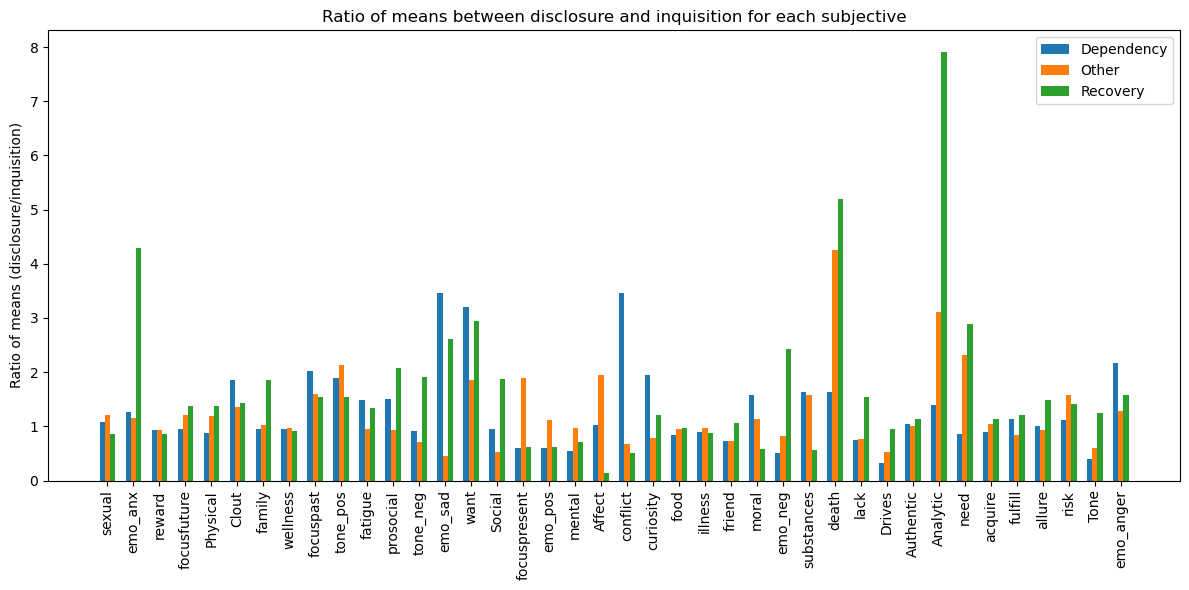

In [53]:
# Extracting data for each category
dependency_data = [liwc_ratio2['ratio'][i] for i in range(len(liwc_ratio2['subjective'])) if liwc_ratio2['subjective'][i] == 'dependency']
other_data = [liwc_ratio2['ratio'][i] for i in range(len(liwc_ratio2['subjective'])) if liwc_ratio2['subjective'][i] == 'other']
recovery_data = [liwc_ratio2['ratio'][i] for i in range(len(liwc_ratio2['subjective'])) if liwc_ratio2['subjective'][i] == 'recovery']

categories = list(set(liwc_ratio2['category']))  # Unique categories

# Plot
plt.figure(figsize=(12, 6))

plt.bar(np.arange(len(categories)) - 0.2, dependency_data, width=0.2, align='center', label='Dependency')
plt.bar(np.arange(len(categories)), other_data, width=0.2, align = 'center', label='Other')
plt.bar(np.arange(len(categories)) + 0.2, recovery_data, width=0.2, align='center', label='Recovery')

plt.xticks(np.arange(len(categories)), categories, rotation=90)
plt.ylabel('Ratio of means (disclosure/inquisition)')
plt.legend()
plt.title('Ratio of means between disclosure and inquisition for each subjective')
plt.tight_layout()

plt.savefig('../output/liwc_ratio.png')

In [66]:
# computer pairwise comparisons
from scipy.stats import ttest_ind
def pairwise_t_tests(data):
    p_values = {}
    for i in range(len(data)):
        for j in range(i+1, len(data)):
            p_values[(i, j)] = ttest_ind(data[i], data[j])[1]
    return p_values


In [69]:
p_values = pairwise_t_tests([dependency_data, other_data, recovery_data])

In [70]:
# print out the p-values
for k, v in p_values.items():
    if v < 0.05:
        print(k, v)